In [1]:
# The number of the dataset: 7

In [2]:
# In case libraries are not installed: 
# pip install pandas
# pip install networkx
# pip install numpy
# pip install matplotlib
#!pip install python-louvain
#!pip install community

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group7/Facebook-Ego/1912.edges"
url2 = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group7/Twitter-Ego/2841151.edges"

FacebookEgo = pd.read_csv(url1, sep=" ", header=None)
TwitterEgo = pd.read_csv(url2, sep=" ", header=None) 

print(FacebookEgo.head())
print(TwitterEgo.head())

# Creating the networks
G_facebook = nx.from_pandas_edgelist(FacebookEgo, source=0, target=1, create_using=nx.Graph())
G_twitter = nx.from_pandas_edgelist(TwitterEgo, source=0, target=1, create_using=nx.DiGraph())


      0     1
0  2046  1941
1  1916  1945
2  1962  1986
3  1984  1979
4  2047  1932
          0         1
0  19595287  14506809
1  14559570  14269220
2  17794004  10699462
3  16089052   7376382
4  21625307  84043660


Set 1:
{1921, 2049, 1923, 2052, 1925, 2053, 2055, 1929, 2057, 2060, 1935, 1936, 1938, 1941, 1946, 1948, 1914, 1951, 1959, 1965, 1970, 563, 1718, 1975, 1976, 1981, 1982, 1983, 1987, 1996, 1997, 1998, 2002, 2004, 2005, 2006, 2010, 2012, 2014, 2017, 2021, 2022, 2026, 2029, 2035, 2036, 2040, 2042, 2044, 1919}

Set 2:
{1920, 1924, 2054, 2056, 1928, 1930, 1931, 136, 1934, 1939, 1940, 1942, 1943, 1945, 1955, 1577, 1963, 1964, 1917, 1966, 1971, 1972, 2046, 1465, 1979, 1984, 1989, 1990, 1991, 1993, 1999, 2003, 2009, 2011, 2015, 2016, 2018, 2020, 2024, 2025, 2030, 2031, 2033, 2037, 2039, 1913, 1915, 1916, 2045, 1918}

Cut size: 182
Conductance: 0.22693266832917705


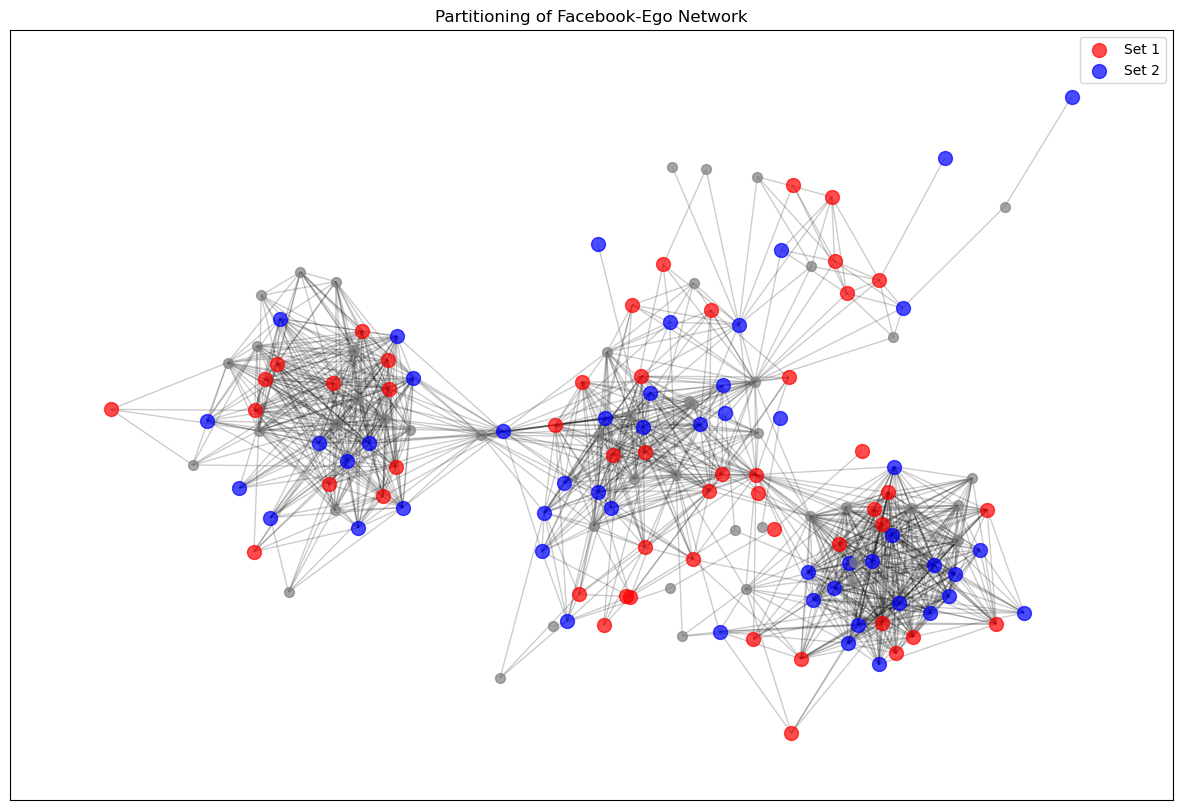

In [4]:
# (a)

import numpy as np
from itertools import combinations

# Randomly select 2 sets of 50 nodes without repetition
all_nodes = list(G_facebook.nodes())
np.random.shuffle(all_nodes)

set_1 = set(all_nodes[:50])
set_2 = set(all_nodes[50:100])

# Print sets of nodes
print("Set 1:")
print(set_1)
print("\nSet 2:")
print(set_2)

# Calculate cut size
cut_size = len([(u, v) for u, v in combinations(set_1.union(set_2), 2) if u in set_1 and v in set_2 and G_facebook.has_edge(u, v)])
print(f"\nCut size: {cut_size}")

# Calculate conductance
vol_set_1 = sum(G_facebook.degree(node) for node in set_1)
vol_set_2 = sum(G_facebook.degree(node) for node in set_2)
min_vol = min(vol_set_1, vol_set_2)
conductance = cut_size / min_vol
print(f"Conductance: {conductance}")

# Plot partitioning
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G_facebook)  # Using Kamada-Kawai layout for better spacing

# Nodes in Set 1
nx.draw_networkx_nodes(G_facebook, pos, nodelist=set_1, node_color='red', node_size=100, label='Set 1', alpha=0.7)

# Nodes in Set 2
nx.draw_networkx_nodes(G_facebook, pos, nodelist=set_2, node_color='blue', node_size=100, label='Set 2', alpha=0.7)

# Remaining nodes
nx.draw_networkx_nodes(G_facebook, pos, nodelist=list(set(all_nodes) - set_1 - set_2), node_color='gray', node_size=50, alpha=0.7)

# Edges
nx.draw_networkx_edges(G_facebook, pos, alpha=0.2, edge_color='black')

plt.legend()
plt.title("Partitioning of Facebook-Ego Network")
plt.show()

Set 3:
{1920, 2049, 1922, 1923, 2053, 2055, 2057, 1938, 1945, 1946, 1947, 1955, 1957, 1958, 1960, 1577, 428, 1965, 1964, 1967, 1968, 1970, 1718, 1919, 1977, 1978, 1981, 1985, 1989, 1990, 1996, 2002, 2003, 2009, 2011, 2014, 2016, 2017, 2018, 2021, 2025, 2029, 2030, 2031, 2032, 2033, 2034, 2041, 2042, 2047}

Set 4:
{1925, 1926, 1927, 1928, 1929, 2058, 2060, 1932, 1934, 1937, 1940, 1941, 1950, 1952, 1953, 1954, 1962, 1963, 1966, 1918, 1973, 1974, 1975, 1976, 1979, 1980, 1983, 1984, 1987, 1991, 1992, 1994, 2000, 2004, 2010, 2012, 2015, 2022, 2023, 2024, 2027, 2028, 2035, 2038, 2039, 1914, 2043, 1916, 2045, 2046}

Cut size: 120
Conductance: 0.16666666666666666


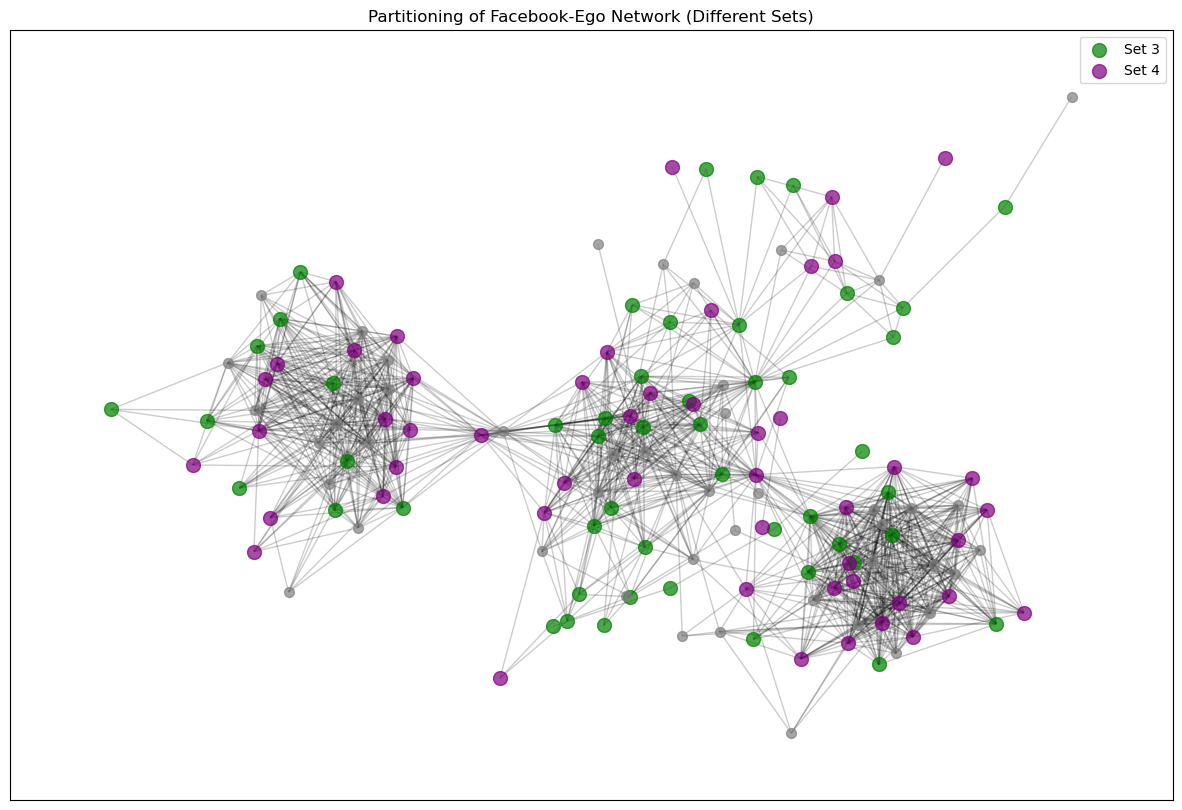

In [5]:
# (b)

# Randomly select 2 different sets of 50 nodes without repetition
np.random.shuffle(all_nodes)

set_3 = set(all_nodes[:50])
set_4 = set(all_nodes[50:100])

# Print sets of nodes
print("Set 3:")
print(set_3)
print("\nSet 4:")
print(set_4)

# Calculate cut size
cut_size_2 = len([(u, v) for u, v in combinations(set_3.union(set_4), 2) if u in set_3 and v in set_4 and G_facebook.has_edge(u, v)])
print(f"\nCut size: {cut_size_2}")

# Calculate conductance
vol_set_3 = sum(G_facebook.degree(node) for node in set_3)
vol_set_4 = sum(G_facebook.degree(node) for node in set_4)
min_vol_2 = min(vol_set_3, vol_set_4)
conductance_2 = cut_size_2 / min_vol_2
print(f"Conductance: {conductance_2}")

# Plot partitioning
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G_facebook)  # Using Kamada-Kawai layout for better spacing

# Nodes in Set 3
nx.draw_networkx_nodes(G_facebook, pos, nodelist=set_3, node_color='green', node_size=100, label='Set 3', alpha=0.7)

# Nodes in Set 4
nx.draw_networkx_nodes(G_facebook, pos, nodelist=set_4, node_color='purple', node_size=100, label='Set 4', alpha=0.7)

# Remaining nodes
nx.draw_networkx_nodes(G_facebook, pos, nodelist=list(set(all_nodes) - set_3 - set_4), node_color='gray', node_size=50, alpha=0.7)

# Edges
nx.draw_networkx_edges(G_facebook, pos, alpha=0.2, edge_color='black')

plt.legend()
plt.title("Partitioning of Facebook-Ego Network (Different Sets)")
plt.show()


The differences observed are the cut size, the conductance, and the visual structure of the communities.

Visually, one set of partitions might appear to be more tightly or loosely interconnected compared to the other. Some partitions might have denser connections within the sets and fewer connections between the sets, indicating stronger communities.

The possible causes of the differences are:
- randomness - since the node sets are chosen randomly, the structure of the partitions could differ significantly between trials.
- network topology - if the network has well-defined communities, some random selections might inadvertently align well with these communities, resulting in a lower cut size and better partitioning.
- node degrees - sets with high-degree nodes might result in a larger cut size as these nodes are likely to have more edges connecting to nodes in the other set.

In [6]:
# (c)

# Creating the Laplacian matrix
L = nx.laplacian_matrix(G_facebook).todense()

# Save to CSV file
pd.DataFrame(L).to_csv("laplacian_matrix.csv", index=False, header=False)

print("Laplacian matrix saved to 'laplacian_matrix.csv'")

# Print the Laplacian matrix
print("Laplacian Matrix:")
print(L)


Laplacian matrix saved to 'laplacian_matrix.csv'
Laplacian Matrix:
[[24 -1  0 ...  0  0  0]
 [-1 40  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


In [7]:
# (d)

# Find all cliques in the graph
cliques = list(nx.find_cliques(G_facebook))

# Display the cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i + 1}: {clique}")

Clique 1: [2049, 1978, 1936, 1990, 2047]
Clique 2: [2049, 1975, 1936, 2035]
Clique 3: [2049, 1975, 1936, 1990, 2047]
Clique 4: [2049, 1975, 1930, 2035]
Clique 5: [2049, 1975, 1930, 2047]
Clique 6: [2049, 1975, 1965]
Clique 7: [2050, 1951, 2018, 1995, 2000, 1998]
Clique 8: [2050, 1951, 2018, 1995, 1980, 1973]
Clique 9: [2050, 1951, 2018, 1995, 1980, 1998]
Clique 10: [2050, 1951, 2018, 2022, 2000, 1998]
Clique 11: [2050, 1951, 2018, 2022, 1980, 1973]
Clique 12: [2050, 1951, 2018, 2022, 1980, 1998]
Clique 13: [2050, 1951, 1958, 1998, 2022, 2000]
Clique 14: [2050, 1951, 1958, 1998, 2022, 1980]
Clique 15: [2055, 2045, 2059, 2056, 1917, 2040]
Clique 16: [2055, 2045, 2059, 2056, 1917, 2033, 1986]
Clique 17: [2055, 2045, 2059, 2056, 1917, 2033, 1918]
Clique 18: [2055, 2045, 2059, 1962, 1943, 2033, 1984, 1986, 2060]
Clique 19: [2055, 2045, 2059, 1962, 1943, 2033, 1984, 1986, 1917, 1983]
Clique 20: [2055, 2045, 2059, 1962, 1943, 2033, 1984, 1918, 1917, 1983]
Clique 21: [2055, 2045, 2059, 1962, 1